In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
listings_df = pd.read_csv('../data/processed/processed_listings.csv')

In [63]:
listings_df.insert(7, 'year', '')
listings_df['year'] = pd.DatetimeIndex(listings_df['listing_date']).year

In [64]:
listings_df.insert(7, 'rooms', '')
listings_df['rooms'] = listings_df["bedrooms"] + listings_df["bathrooms"]

In [65]:
ordinal_cols = ['location', 'year']
one_hot_cols = ['bedrooms', 'bathrooms', 'rooms']
numerical_cols = ['living_area', 'lot_dimensions']
target_col = ['price']

In [66]:
listings_df = listings_df[ordinal_cols + one_hot_cols + numerical_cols + target_col]

In [67]:
listings_df.head()

,location,year,bedrooms,bathrooms,rooms,living_area,lot_dimensions,price
0,Beauport,2020,3,1,4,1191,4076,332500
1,Deschambault,2021,2,1,3,1261,9500,265000
2,Mercier,2021,3,1,4,1645,1360,612000
3,Stoneham,2021,4,3,7,2024,17000,526500
4,Gatineau,2021,4,2,6,2400,4471,360000


In [73]:
def plot_corr_map(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

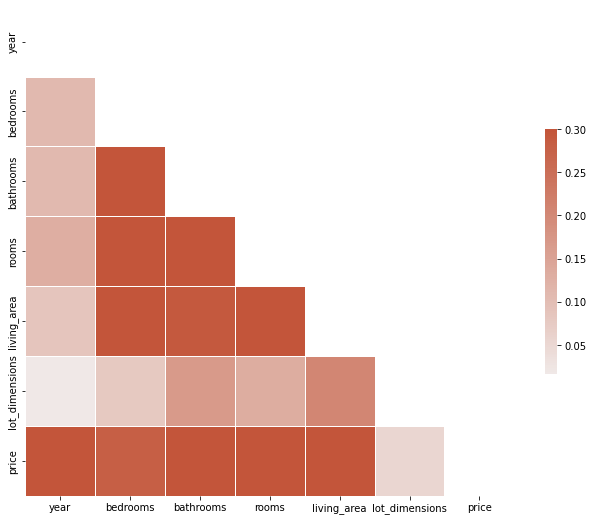

In [74]:
plot_corr_map(listings_df)

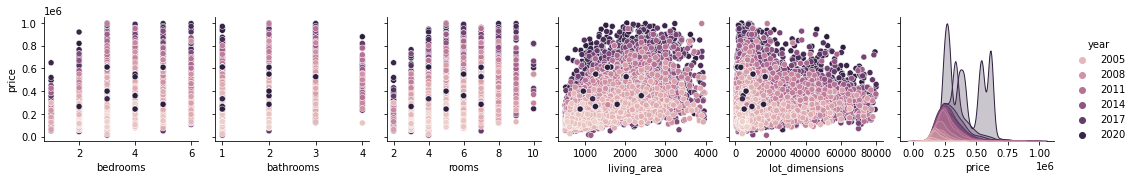

In [68]:
sns.pairplot(listings_df, y_vars=['price'], hue='year')

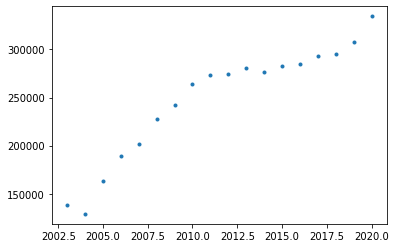

In [69]:
mean_prices = []

min_y = min(listings_df['year'].unique())
max_y = max(listings_df['year'].unique())
years = range(min_y, max_y)

for y in years:
    mean_prices.append(listings_df[listings_df['year'] == y]['price'].mean())

plt.figure()
plt.plot(years, mean_prices, '.')


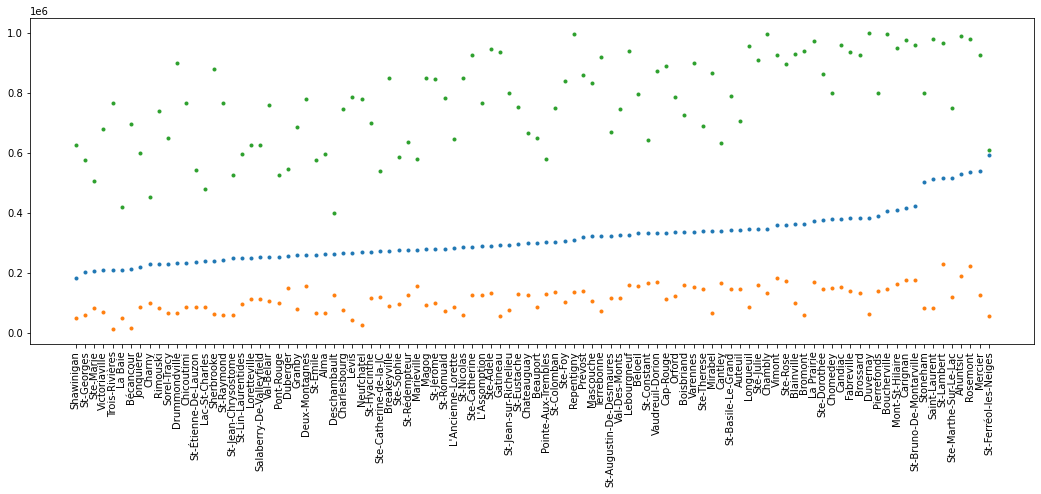

In [97]:
mean_prices = []
min_prices = []
max_prices = []

locations = listings_df['location'].unique()

for y in locations:
    prices = listings_df[listings_df['location'] == y]['price']
    mean_prices.append(int(prices.mean()))
    min_prices.append(int(prices.min()))
    max_prices.append(int(prices.max()))

mean_prices = np.array(mean_prices)
min_prices = np.array(min_prices)
max_prices = np.array(max_prices)

ind_sort = np.argsort(mean_prices)

plt.figure(figsize=(18, 6))
plt.xticks(rotation='vertical')
plt.plot(locations[ind_sort], mean_prices[ind_sort], '.', min_prices[ind_sort], '.', max_prices[ind_sort], '.')